In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import save_model

2023-11-16 04:22:11.354427: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-16 04:22:11.386020: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 04:22:11.386053: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 04:22:11.386082: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 04:22:11.396954: I tensorflow/core/platform/cpu_feature_g

In [2]:
images = []
races = []

for image in os.listdir('../data/UTKFace_resized_childfree_48'):
    split = image.split('_')
    if len(split) != 4:
        print(image)
        print(split)
        continue

    races.append(int(split[2]))   
    images.append(Image.open('../data/UTKFace_resized_childfree_48/' + image))

61_1_20170109142408075.jpg.chip.jpg
['61', '1', '20170109142408075.jpg.chip.jpg']


In [3]:
images = pd.Series(list(images), name = 'Images')
race = pd.Series(list(races), name = 'Races')
df = pd.concat([images, race], axis=1)

In [4]:
df.head(10)

,Images,Races
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3
7,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2
8,<PIL.JpegImagePlugin.JpegImageFile image mode=...,4
9,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3


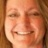

0


In [5]:
display(df['Images'][1])
print(df['Races'][0])

/tmp/ipykernel_69692/2602398069.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Races'], kde=True, bins=30)


<Axes: xlabel='Races', ylabel='Density'>

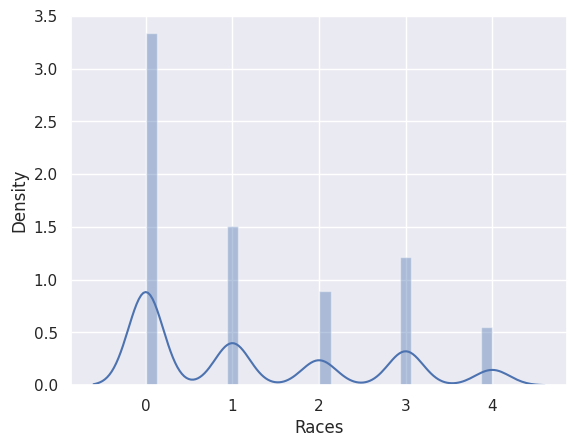

In [6]:
sns.set_theme()
sns.distplot(df['Races'], kde=True, bins=30)

In [7]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((48,48))
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    race = [int(df['Races'].iloc[i])]
    y.append(race)
x = np.array(x)

/tmp/ipykernel_69692/101338773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((48,48))
/tmp/ipykernel_69692/101338773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((48,48))
/tmp/ipykernel_69692/101338773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((48,48))
/tmp/ipyke

In [8]:
df.head(10)

,Images,Races
0,<PIL.Image.Image image mode=RGB size=48x48 at ...,0
1,<PIL.Image.Image image mode=RGB size=48x48 at ...,0
2,<PIL.Image.Image image mode=RGB size=48x48 at ...,2
3,<PIL.Image.Image image mode=RGB size=48x48 at ...,1
4,<PIL.Image.Image image mode=RGB size=48x48 at ...,0
5,<PIL.Image.Image image mode=RGB size=48x48 at ...,0
6,<PIL.Image.Image image mode=RGB size=48x48 at ...,3
7,<PIL.Image.Image image mode=RGB size=48x48 at ...,2
8,<PIL.Image.Image image mode=RGB size=48x48 at ...,4
9,<PIL.Image.Image image mode=RGB size=48x48 at ...,3


In [9]:
y_race = df['Races']

x_train_race, x_test_race, y_train_race, y_test_race = train_test_split(x, y_race, test_size=0.2, stratify=y_race)

In [10]:
race_model = Sequential()
race_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 3)))
race_model.add(MaxPooling2D((2,2)))
race_model.add(Conv2D(64, (3,3), activation='relu'))
race_model.add(MaxPooling2D((2,2)))
race_model.add(Conv2D(128, (3,3), activation='relu'))
race_model.add(MaxPooling2D((2,2)))
race_model.add(Flatten())
race_model.add(Dense(64, activation='relu'))
race_model.add(Dropout(0.5))
race_model.add(Dense(1, activation='sigmoid'))
race_model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

2023-11-16 04:22:16.525770: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-16 04:22:16.530208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-16 04:22:16.530412: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
datagen = ImageDataGenerator(rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train3 = datagen.flow(x_train_race, y_train_race, batch_size=64)

In [14]:
test3 = test_datagen.flow(x_test_race, y_test_race, batch_size=64)

In [15]:
history3 = race_model.fit(train3, epochs=30, shuffle=True, validation_data=test3, verbose=1)

Epoch 1/30


/home/vorkov/Workspace/EDA/venv/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
2023-11-16 04:22:17.271709: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-16 04:22:17.369113: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-16 04:22:17.523283: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-16 04:22:17.949275: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f4da492db70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-16 04:22:17.949320: I tensorflo

172/172 [==============================] - 6s 23ms/step - loss: 0.0000e+00 - accuracy: 0.2032 - val_loss: 0.0000e+00 - val_accuracy: 0.2007
Epoch 2/30
172/172 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2010 - val_loss: 0.0000e+00 - val_accuracy: 0.2007
Epoch 3/30
172/172 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2010 - val_loss: 0.0000e+00 - val_accuracy: 0.2007
Epoch 4/30
172/172 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2010 - val_loss: 0.0000e+00 - val_accuracy: 0.2007
Epoch 5/30
172/172 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2010 - val_loss: 0.0000e+00 - val_accuracy: 0.2007
Epoch 6/30
172/172 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2010 - val_loss: 0.0000e+00 - val_accuracy: 0.2007
Epoch 7/30
172/172 [==============================] - 4s 21ms/step - loss: 0.0000e+00 - accuracy: 0.2010 

In [16]:
save_model(race_model, '../../models/model_race_48.model')
race_model.save_weights('../../models/weights_race_48.h5')

INFO:tensorflow:Assets written to: ../../models/model_race_48.model/assets


INFO:tensorflow:Assets written to: ../../models/model_race_48.model/assets


In [17]:
from sklearn.metrics import f1_score
f1_score(race_model.predict(test3), y_test_race, average="weighted")

43/43 [==============================] - 0s 2ms/step


0.33434466019417475